In [23]:
import pandas as pd
import seaborn as sns
import pylab as plt
import pickle
import numpy as np
import wbdata

%matplotlib inline

sns.set(font_scale=1.3)
sns.set_style("white")

In [2]:
name2iso2 = pickle.load(open("./data/name2iso2.dump","rb"))
iso22name = {v: k for k, v in name2iso2.items()}

In [3]:

indicators = {"SE.SEC.TCHR": "Teachers, secondary",
              "SE.PRM.TCHR": "Teachers, primary",
"SH.MED.PHYS.ZS": "Physicians",
             "NY.GDP.MKTP.CD": "GDP",
"SP.POP.TOTL": "Population"}

wbd = wbdata.get_dataframe(indicators, country="all", convert_date=False)
wbd = wbd.reset_index()
wbd["iso2"] = wbd["country"].map(name2iso2)
wbd = wbd.groupby("iso2").mean().reset_index()
wbd["Teachers"] = wbd["Teachers, primary"] + wbd["Teachers, secondary"]
wbd["Physicians"] *= (wbd["Population"]/1000)
del wbd["Teachers, primary"]
del wbd["Teachers, secondary"]
wbd.head()

,iso2,GDP,Physicians,Population,Teachers
0,AD,1.501056e+09,153.241559,5.066674e+04,880.220588
1,AE,1.372487e+11,4087.846373,2.838900e+06,18849.495238
2,AF,6.620578e+09,3173.957079,1.735924e+07,85858.431159
3,AG,7.172131e+08,70.603285,7.621790e+04,1080.197115
4,AL,6.220172e+09,3261.109418,2.703056e+06,34600.000000


## Read data

In [4]:
df = pd.read_csv("data/linkedin_results.csv",sep="\t",header=None,names=["iso2","country","keyword","count"])
df["iso2"] = df["iso2"].str.upper()
professions = pd.pivot_table(df,values="count",index="iso2",columns="keyword").reset_index()
professions = pd.merge(professions,wbd,how="outer")
professions.head()

,iso2,Doctor,Engineer,IT Specialist,International tax,Lawyer,Manager,TP advisor,TP analyst,TP consultant,...,physician,tax analyst,tax consultant,tax lawyer,tax planning,wealth advisor,GDP,Physicians,Population,Teachers
0,AD,20.0,325.0,13.0,99.0,59.0,1749.0,0.0,2.0,0.0,...,6.0,4.0,11.0,7.0,86.0,39.0,1.501056e+09,153.241559,5.066674e+04,880.220588
1,AE,4993.0,259044.0,6516.0,18871.0,3705.0,621648.0,58.0,87.0,5.0,...,2252.0,588.0,867.0,43.0,21093.0,2731.0,1.372487e+11,4087.846373,2.838900e+06,18849.495238
2,AF,1419.0,8374.0,474.0,690.0,288.0,23697.0,0.0,0.0,1.0,...,93.0,19.0,29.0,1.0,633.0,12.0,6.620578e+09,3173.957079,1.735924e+07,85858.431159
3,AG,38.0,318.0,25.0,33.0,12.0,2090.0,0.0,0.0,1.0,...,23.0,5.0,2.0,3.0,58.0,3.0,7.172131e+08,70.603285,7.621790e+04,1080.197115
4,AI,21.0,125.0,6.0,16.0,7.0,833.0,0.0,0.0,0.0,...,7.0,2.0,5.0,0.0,10.0,1.0,NaN,NaN,NaN,NaN


In [5]:
def plot(data,x,y,scale="log"):
    for c,x_,y_ in zip(data["iso2"],data[x],data[y]):
        
        plt.annotate(c,(x_,y_),fontsize=10)
    
    plt.plot(data[x],data[y],".")
    if scale=="log":
        plt.yscale("log")
        plt.xscale("log")
    sns.despine()
    plt.grid()
    plt.xlabel(x)
    plt.ylabel(y)
    


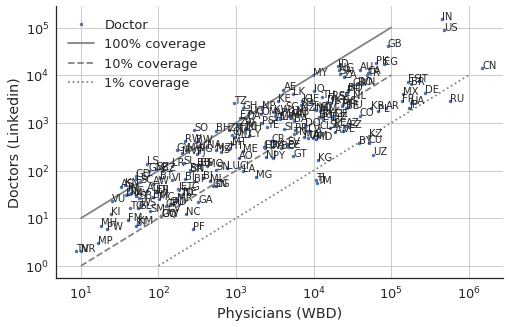

In [16]:
plt.figure(figsize=(8,5))
plot(professions,"Physicians","Doctor")
plt.plot([10,1E5],[10,1E5],color="gray",label="100% coverage")
plt.plot([10,1E5],[1,1E4],"--",color="gray",label="10% coverage")
plt.plot([100,1E6],[1,1E4],":",color="gray",label="1% coverage")
plt.xlabel("Physicians (WBD)")
plt.ylabel("Doctors (Linkedin)")
plt.legend()
plt.show()

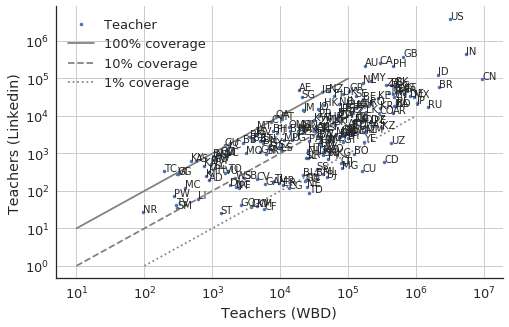

In [7]:
plt.figure(figsize=(8,5))
plot(professions,"Teachers","Teacher")
plt.plot([10,1E5],[10,1E5],color="gray",label="100% coverage")
plt.plot([10,1E5],[1,1E4],"--",color="gray",label="10% coverage")
plt.plot([100,1E6],[1,1E4],":",color="gray",label="1% coverage")
plt.xlabel("Teachers (WBD)")
plt.ylabel("Teachers (Linkedin)")
plt.legend()
plt.show()

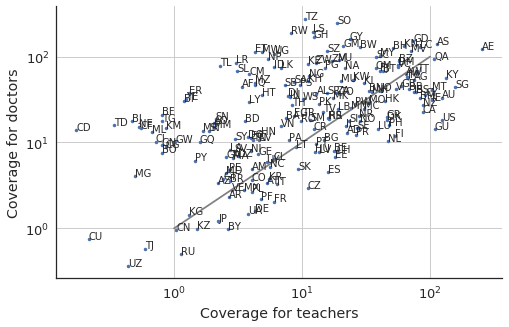

In [31]:
professions["coverage_teachers"] = 100*professions["Teacher"]/professions["Teachers"]
professions["coverage_doctor"] = 100*professions["Doctor"]/professions["Physicians"]

plt.figure(figsize=(8,5))
plot(professions,"coverage_teachers","coverage_doctor")
plt.plot([1,100],[1,100],color="gray",label="Same coverage")
# plt.plot([10,1E5],[1,1E4],"--",color="gray",label="10% coverage")
# plt.plot([100,1E6],[1,1E4],":",color="gray",label="1% coverage")
plt.xlabel("Coverage for teachers")
plt.ylabel("Coverage for doctors")
plt.show()

In [212]:
professions["Tax_doctor"] = professions["Tax"]/professions["Doctor"]
professions["Tax_lawyer"] = professions["Tax"]/professions["Lawyer"]
#professions["Tax_engineer"] = professions["Tax"]/professions["Engineer"]
professions["Wealth manager_doctor"] = professions["Wealth manager"]/professions["Doctor"]
professions["Wealth manager_lawyer"] = professions["Wealth manager"]/professions["Lawyer"]
#professions["Wealth manager_engineer"] = professions["Wealth manager"]/professions["Engineer"]
professions["Transfer pricing_doctor"] = professions["Transfer pricing"]/professions["Doctor"]
professions["Transfer pricing_lawyer"] = professions["Transfer pricing"]/professions["Lawyer"]
#professions["Transfer pricing_engineer"] = professions["Transfer pricing"]/professions["Engineer"]

In [213]:
from sklearn.preprocessing import StandardScaler,RobustScaler

In [288]:
iso22name["DE"] = "Germany"
temp = professions[["iso2"]+[_ for _ in professions.columns if "_" in _]].sort_values(by="Tax_doctor",ascending=False)
temp["country"] = temp["iso2"].map(iso22name)
temp= temp.dropna()
del temp["iso2"]
temp = temp.set_index("country")
temp[:] = StandardScaler().fit_transform(temp[:].values)
temp.head(20)

,Tax_doctor,Wealth manager_doctor,Transfer pricing_doctor,Tax_lawyer,Wealth manager_lawyer,Transfer pricing_lawyer,Lawyers_Doctors
country,,,,,,,
Luxembourg,10.763164,5.912090,12.960415,-0.132589,0.144593,1.255074,7.785937
Gibraltar,4.115304,3.153934,0.826156,0.649208,1.091233,0.065779,1.117385
Guernsey,2.994201,7.618866,0.625859,0.818413,4.568072,0.261431,0.574408
Cayman Islands,2.724248,2.210865,0.840246,0.084709,0.568474,-0.020538,1.319262
Northern Mariana Isl,2.641560,-0.094869,-0.399663,1.571144,-0.185614,-0.866442,0.123687
Bermuda,2.522614,1.601259,1.390422,0.385772,0.621015,0.825367,0.773610
Liechtenstein,2.408426,3.094865,3.413996,0.003261,0.927941,1.765261,1.296969
United States,2.312598,0.532557,0.752727,4.392764,1.621576,3.909862,-0.319618
"Jersey, Channel Islands",2.076189,7.298859,0.371041,0.572785,5.049179,0.101896,0.422702


In [289]:
from sklearn.decomposition import PCA

temp2 = temp.copy()
pca = PCA()
temp2[:] = pca.fit_transform(temp[:].values)
print(pca.explained_variance_ratio_)

[ 0.47121245  0.26232721  0.12420817  0.06286782  0.05049044  0.02015609
  0.00873781]


In [290]:
temp.columns

Index(['Tax_doctor', 'Wealth manager_doctor', 'Transfer pricing_doctor',
       'Tax_lawyer', 'Wealth manager_lawyer', 'Transfer pricing_lawyer',
       'Lawyers_Doctors'],
      dtype='object')

In [291]:
import numpy as np
np.round(pca.components_[:3],1)

array([[ 0.5,  0.5,  0.4,  0.2,  0.3,  0.3,  0.3],
       [ 0.2,  0. ,  0.3, -0.6, -0.4, -0.4,  0.5],
       [-0.1,  0.5, -0.3, -0.2,  0.5, -0.5, -0.1]])

In [292]:
temp2.columns = list(range(temp2.shape[1]))

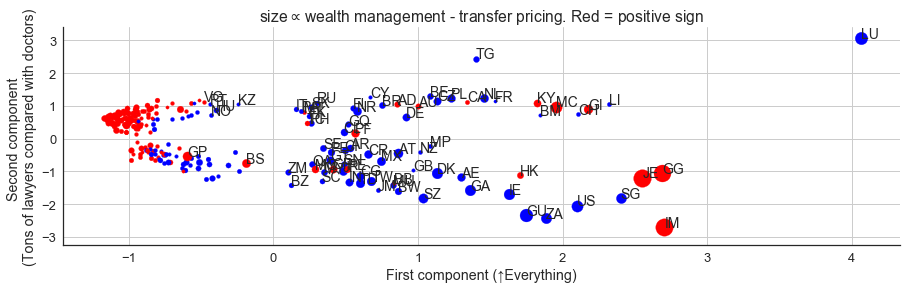

In [302]:
temp2["iso2"] = [name2iso2[_] for _ in temp2.index]
data = temp2.copy()
data[0] = np.sign(data[0])*np.sqrt(np.abs(data[0]))
data[1] = np.sign(data[1])*np.sqrt(np.abs(data[1]))

plt.figure(figsize=(15,4))
for c,x_,y_,s_ in zip(data["iso2"],data[0],data[1],data[2]):
    if ((x_>-0.5) & (x_<0) & (y_>0)):
        plt.annotate(c,(x_,y_),fontsize=14)
    elif s_>1:
        plt.annotate(c,(x_,y_),fontsize=14)
    elif x_>0:
        plt.annotate(c,(x_,y_),fontsize=14)
    if s_<0:
        color = "blue"
    else:
        color = "red"
    plt.scatter(x_,y_,s=10+50*np.abs(s_),color=color)

sns.despine()
plt.grid()

    
plt.xlabel("First component (↑Everything)")
plt.ylabel("Second component \n(Tons of lawyers compared with doctors)")
plt.title(r"size$\propto$wealth management - transfer pricing. Red = positive sign")


In [295]:
data.loc[iso22name["VG"]].reset_index()

,index,"Virgin Islands, British"
0,0,-0.482929
1,1,1.13411
2,2,0.105219
3,3,0.732797
4,4,-0.0443748
5,5,-0.0597082
6,6,0.420585
7,iso2,VG
